# Task 1
This is to make copying and pasting plots into the report easier and more accessible for future reference.

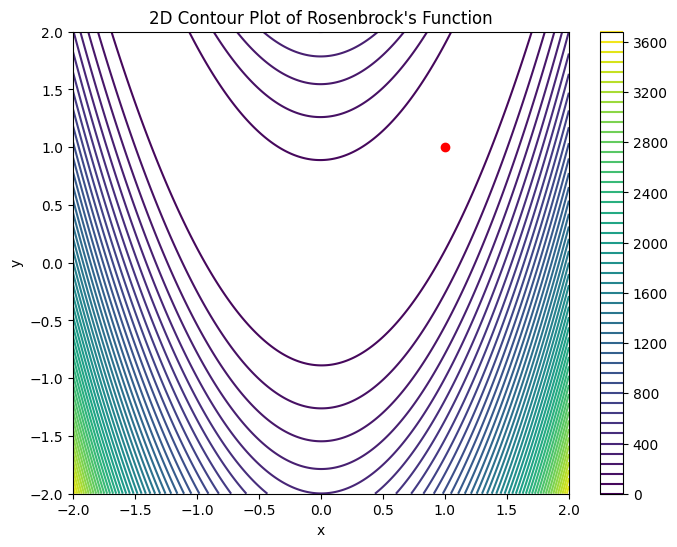

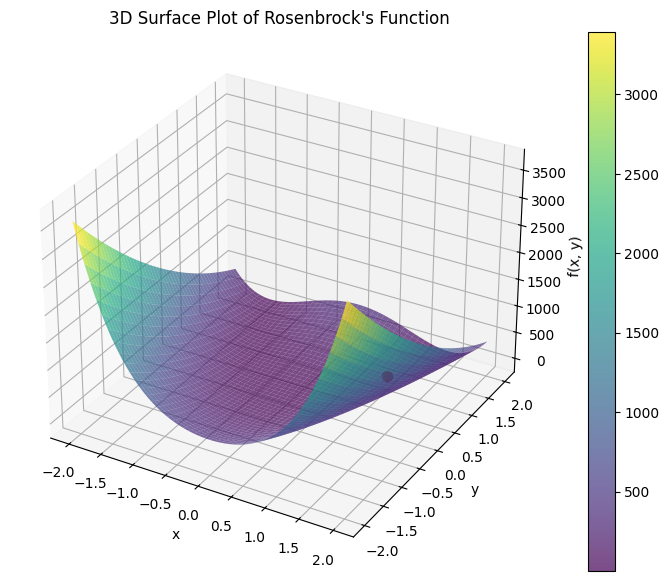

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Defining Rosenbrock Function
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2


# Task 1: Visualize Rosenbrock Function
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# 2D Contour Plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap="viridis")
plt.plot(1, 1, 'ro')  # Mark the minimum point
plt.colorbar(contour)
plt.title("2D Contour Plot of Rosenbrock's Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 3D Surface Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor='none', alpha=0.7)
ax.set_title("3D Surface Plot of Rosenbrock's Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.scatter(1, 1, rosenbrock(1, 1), color='r', s=50)  # Mark the minimum point
fig.colorbar(surface)
plt.show()


# Task 2 

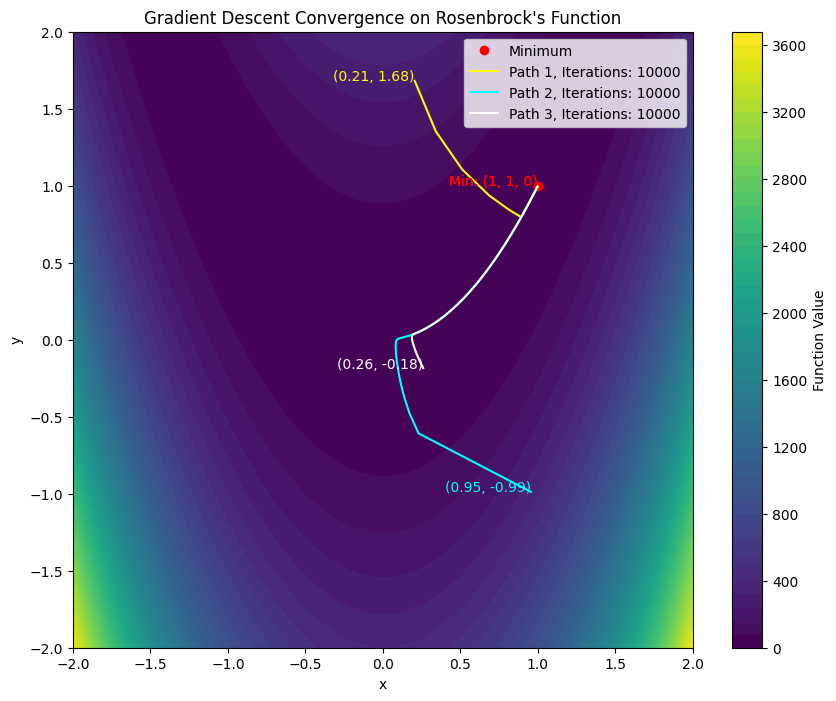

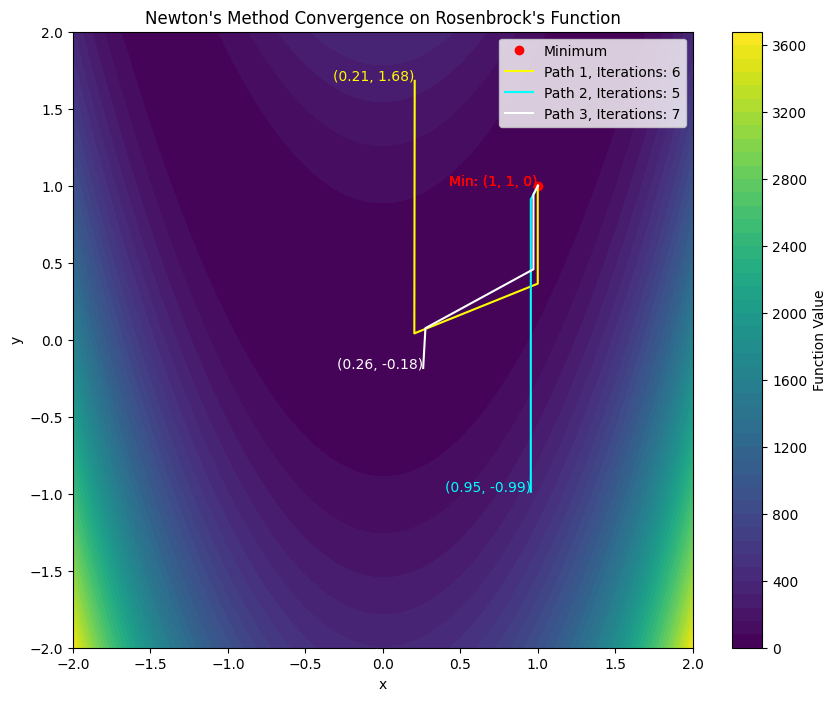

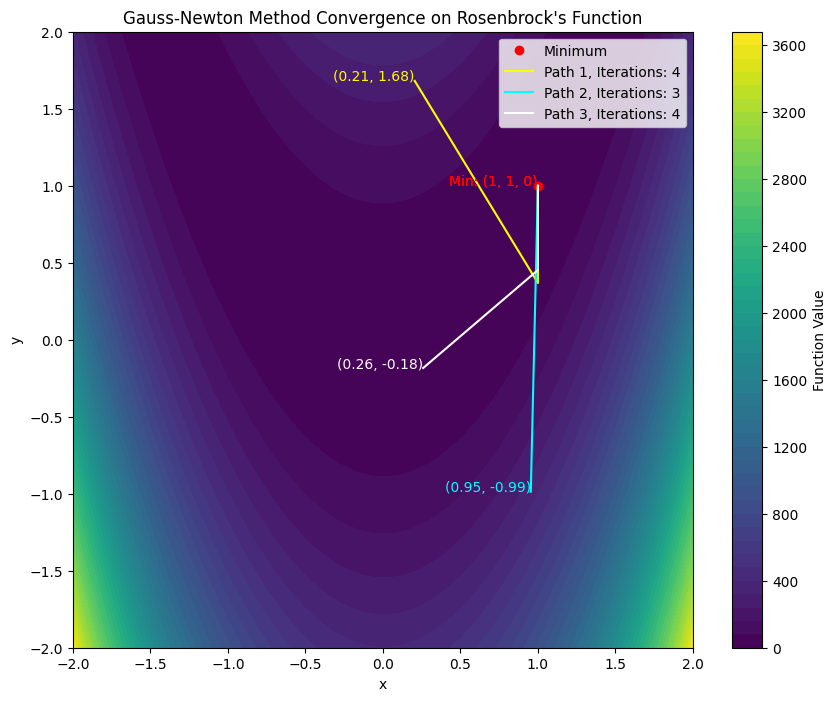

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function, gradient, and Hessian
def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

def gradient(x, y):
    dfdx = -400 * x * (y - x**2) - 2 * (1 - x)
    dfdy = 200 * (y - x**2)
    return np.array([dfdx, dfdy])

def hessian(x, y):
    d2fdx2 = -400 * (y - x**2) + 800 * x**2 + 2
    d2fdxdy = -400 * x
    d2fdy2 = 200
    return np.array([[d2fdx2, d2fdxdy], [d2fdxdy, d2fdy2]])

# Gradient Descent Algorithm with stopping condition
def gradient_descent(start_point, learning_rate=0.001, max_iterations=9999, tolerance=1e-6):
    path = [start_point]
    for _ in range(max_iterations):
        grad = gradient(*path[-1])
        new_point = path[-1] - learning_rate * grad
        path.append(new_point)
        
        # Stop if the gradient is small enough (convergence)
        if np.linalg.norm(grad) < tolerance:
            break
    return np.array(path)

# Newton's Method with stopping condition
def newton_method(start_point, max_iterations=10000, tolerance=1e-6):
    path = [start_point]
    for _ in range(max_iterations):
        grad = gradient(*path[-1])
        H = hessian(*path[-1])
        try:
            new_point = path[-1] - np.linalg.inv(H).dot(grad)
        except np.linalg.LinAlgError:
            break  # Exit if Hessian is singular and cannot be inverted
        path.append(new_point)
        
        # Stop if the change in position is very small (convergence)
        if np.linalg.norm(new_point - path[-2]) < tolerance:
            break
    return np.array(path)

# Gauss-Newton Method with damping factor for faster convergence
def gauss_newton_method(start_point, damping_factor=1e-9, max_iterations=9999, tolerance=1e-1):
    path = [np.array(start_point)]
    for _ in range(max_iterations):
        x, y = path[-1]
        
        # Define residuals for the Rosenbrock function
        r1 = 10 * (y - x**2)
        r2 = 1 - x
        residuals = np.array([r1, r2])  # (2,)
        
        # Define Jacobian of residuals
        J = np.array([[-20 * x, 10], [-1, 0]])  # (2, 2)
        
        # Compute damped J.T @ J to avoid instability
        J_damped = J.T @ J + damping_factor * np.eye(2)  # Add damping factor for stability
        
        # Update step with the damped version
        try:
            delta = np.linalg.inv(J_damped) @ J.T @ residuals  # Solve for step size
        except np.linalg.LinAlgError:
            break  # Exit if matrix inversion fails
        
        # Update position based on the step
        new_point = path[-1] - delta
        path.append(new_point)
        
        # Break if the update is small (convergence)
        if np.linalg.norm(delta) < tolerance:
            break
    
    return np.array(path)

# Create a grid for the contour plot
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

# Updated function to correctly overlay paths on the Rosenbrock function
def plot_grouped(method_name, paths, colors, start_points, iterations_list):
    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.colorbar(contour_filled, label="Function Value")  # Color bar added
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum
    for i, path in enumerate(paths):
        # Plot optimization paths
        plt.plot(path[:, 0], path[:, 1], color=colors[i], label=f"Path {i+1}, Iterations: {iterations_list[i]}")
        # Annotate starting points with coordinate values
        plt.text(1, 1, f"Min: (1, 1, 0)", color='red', fontsize=10, ha='right')
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 color=colors[i], fontsize=10, ha='right')
    plt.title(f"{method_name} Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations
colors = ['xkcd:bright yellow', 'xkcd:cyan', 'xkcd:white']  # Colors for the paths

# Collect paths for each method
gd_paths = [gradient_descent(start_point) for start_point in start_points]
newton_paths = [newton_method(start_point) for start_point in start_points]
gn_paths = [gauss_newton_method(start_point) for start_point in start_points]

# Calculate the number of iterations for each path
gd_iterations = [len(path) for path in gd_paths]
newton_iterations = [len(path) for path in newton_paths]
gn_iterations = [len(path) for path in gn_paths]

# Plot grouped results with the number of iterations
plot_grouped("Gradient Descent", gd_paths, colors, start_points, gd_iterations)
plot_grouped("Newton's Method", newton_paths, colors, start_points, newton_iterations)
plot_grouped("Gauss-Newton Method", gn_paths, colors, start_points, gn_iterations)


## To output the 3 plots together

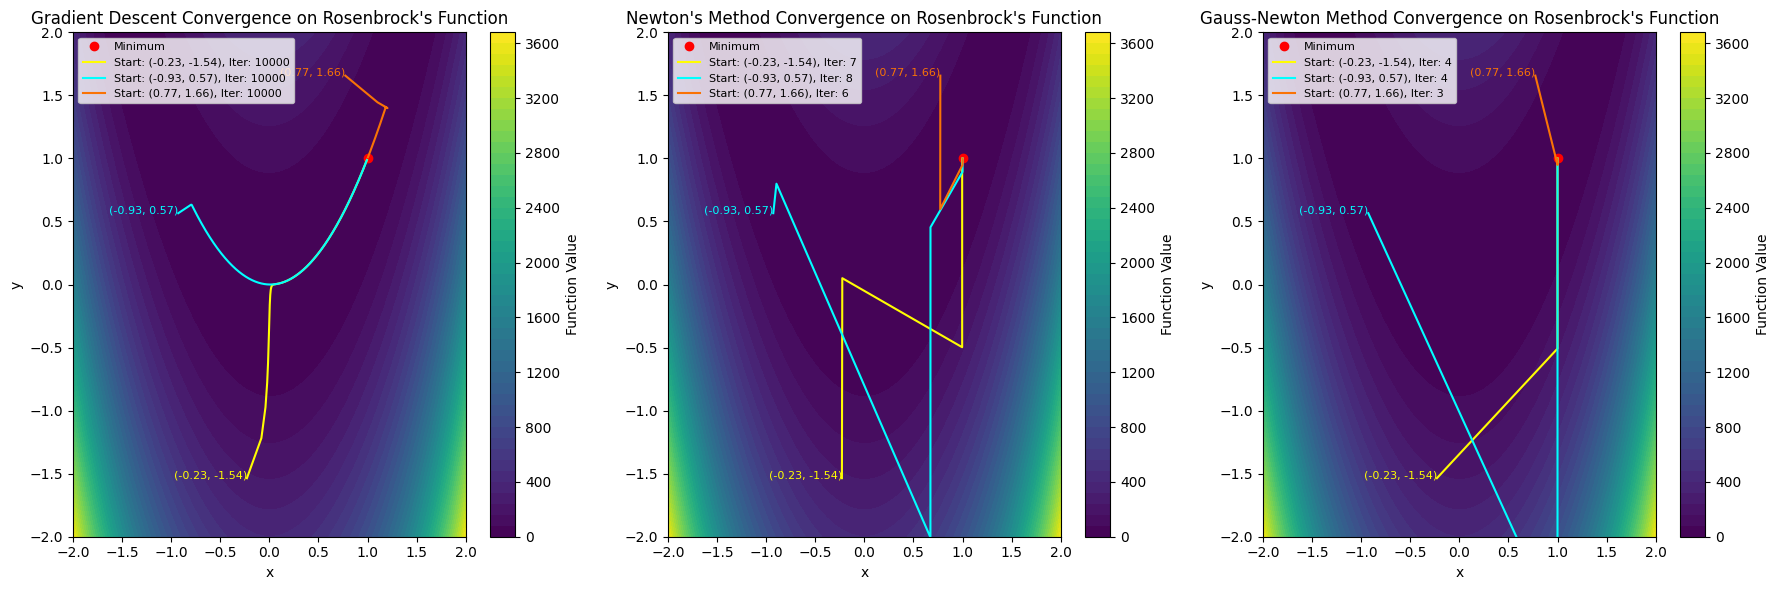

In [25]:
# Function to plot multiple iterations for each method on the same subplot
def plot_method(ax, method_name, paths, colors, start_points, iterations_list):
    contour_filled = ax.contourf(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    fig.colorbar(contour_filled, ax=ax, label="Function Value")  # Color bar added here using fig.colorbar
    ax.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum
    
    # Plot paths for each initialization
    for path, color, start_point, iterations in zip(paths, colors, start_points, iterations_list):
        ax.plot(path[:, 0], path[:, 1], color=color, label=f"Start: ({start_point[0]:.2f}, {start_point[1]:.2f}), Iter: {iterations}")
        ax.text(start_point[0], start_point[1], 
                f"({start_point[0]:.2f}, {start_point[1]:.2f})", color=color, fontsize=8, ha='right')
    
    ax.set_title(f"{method_name} Convergence on Rosenbrock's Function")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim([-2, 2])  # Ensure correct domain
    ax.set_ylim([-2, 2])  # Ensure correct domain
    ax.legend(fontsize=8)

# Create random initializations for each method
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations per method
colors = ['xkcd:bright yellow', 'xkcd:cyan', 'xkcd:orange']  # Colors for the paths

# Collect paths for each method with 3 initializations
gd_paths = [gradient_descent(start_point) for start_point in start_points]
newton_paths = [newton_method(start_point) for start_point in start_points]
gn_paths = [gauss_newton_method(start_point) for start_point in start_points]

# Calculate the number of iterations for each path
gd_iterations = [len(path) for path in gd_paths]
newton_iterations = [len(path) for path in newton_paths]
gn_iterations = [len(path) for path in gn_paths]

# Create subplots to display the methods side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
plot_method(axs[0], "Gradient Descent", gd_paths, colors, start_points, gd_iterations)
plot_method(axs[1], "Newton's Method", newton_paths, colors, start_points, newton_iterations)
plot_method(axs[2], "Gauss-Newton Method", gn_paths, colors, start_points, gn_iterations)

plt.tight_layout()
plt.show()


# Task 3

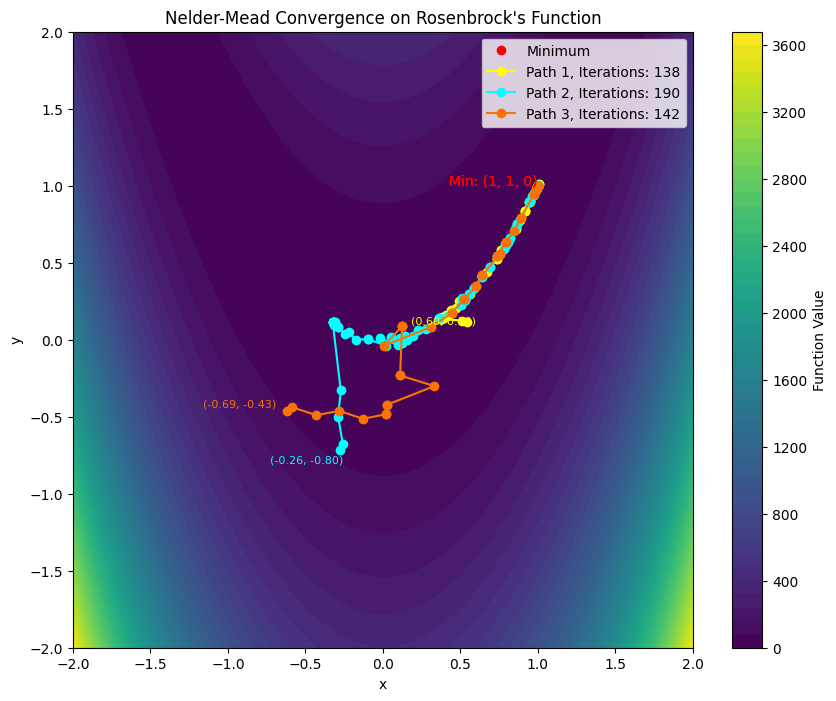

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Function to execute Nelder-Mead optimization with a callback to track points
def nelder_mead(start_point):
    path = []  # To store intermediate points
    # Define the callback function to store the current point at each iteration
    def callback(xk):
        path.append(xk.copy())  # Store a copy of the current point
    # Perform Nelder-Mead optimization with the callback
    result = minimize(rosenbrock, start_point, method='Nelder-Mead', options={'xatol': 1e-5, 'fatol': 1e-1}, callback=callback)
    return result, path

# Function to plot the Nelder-Mead optimization paths
def plot_nelder_mead(paths, start_points, iterations_list, colors):
    x_vals = np.linspace(-2, 2, 200)
    y_vals = np.linspace(-2, 2, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock([X, Y])

    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.colorbar(contour_filled, label="Function Value")  # Color bar added
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum (red for minimum point)

    # Plot the paths of optimization
    for i, path in enumerate(paths):
        path = np.array(path)  # Convert to array for easier indexing
        plt.plot(path[:, 0], path[:, 1], marker='o', color=colors[i], label=f"Path {i+1}, Iterations: {iterations_list[i]}")

        # Annotate starting points with coordinate values and respective colors
        plt.text(1, 1, f"Min: (1, 1, 0)", color='red', fontsize=10, ha='right')
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 color=colors[i], fontsize=8, ha='right')
    
    plt.title(f"Nelder-Mead Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization of start points
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations

# Assign colors for each starting point and path
colors = ['xkcd:bright yellow', 'xkcd:cyan', 'xkcd:orange']

# Collect paths for each method
nm_paths = []
iterations_list = []
for start_point in start_points:
    result, path = nelder_mead(start_point)
    nm_paths.append(path)  # Store the path
    iterations_list.append(result.nfev)  # Number of function evaluations as iteration count

# Plot the Nelder-Mead results
plot_nelder_mead(nm_paths, start_points, iterations_list, colors)
